In [1]:
import numpy as np
import pandas as pd
import astropy.constants as const
#import scipy.constants as const
import astropy.units as u
import argparse
import sys
import math
import matplotlib.pyplot as plt

# Exercise 6.16: Lagrange Point

In [33]:
def lagrange(r):
    G = const.G
    M = const.M_earth
    m = 7.348e22 * u.kg
    R = 3.844e8 * u.m
    omega = 2.662e-6 * (1/u.s)
    
    L = ((G * M) / np.square(r * u.m)) - ((G * m) / np.square(R - (r * u.m))) - (np.square(omega) * (r * u.m))
    
    return L.value

In [34]:
def deriv_lagrange(r):
    G = const.G
    M = const.M_earth
    m = 7.348e22 * u.kg
    R = 3.844e8 * u.m
    omega = 2.662e-6 * (1/u.s)
    
    L_prime = ((-2 * G * M)/((r * u.m) ** 3)) - ((2 * G * m) / ((R - (r * u.m)) ** 3)) - np.square(omega)
    
    return L_prime.value

In [35]:
r_range = np.linspace(1e8, 2e9, 1000)
L_vals = []
L_prime_vals = []

for r in r_range:
    L_vals.append(lagrange(r))
    L_prime_vals.append(deriv_lagrange(r))

In [37]:
#L1 guess = 3.3e8 m
L1_guess = 3.3e8

def newtons_method(x_1, f = lagrange, f_prime = deriv_lagrange, tol = 1e-10, max_iter = 100000):
    num_iter = 0
    
    x_2 = x_1 - (f(x_1) / f_prime(x_1)) #x_2 isn't dependent on the second guess. It's dependent on P(x_1) and its derivative.
    
    while abs(x_2 - x_1) > tol: #Make sure the derivative isn't 0, or the function will fail
        num_iter += 1
        x_1 = x_2 #x_1 keeps changing until a root is found
        x_2 = x_1 - (f(x_1) / f_prime(x_1))
        
        if num_iter > max_iter: #Will be an infinite loop if we don't define the max iterations
            print(f"Did not converge after {max_iter} iterations.")
            return None #Won't return any values
    return x_2

In [38]:
newtons_method(L1_guess)

326031897.52854335

In [40]:
def secant_method(x_1, x_2, f = lagrange, tol = 1e-10, max_iter = 100000):
    #For the secant method, we're using pairs of points to find the roots
    
    num_iter = 0
    
    x_3 = x_2  - (f(x_2) * x_2  - ((x_2 - x_1) / (f(x_2) - f(x_1))))
    
    while abs(x_2 - x_3) > tol:
        num_iter += 1
        
        x_1 = x_2
        x_2 = x_3
        
        x_3 = x_2  - (f(x_2) * ((x_2 - x_1) / (f(x_2) - f(x_1))))
        
        if num_iter > max_iter: #Will be an infinite loop if we don't define the max iterations
            print(f"Did not converge after {max_iter} iterations.")
            return None #Won't return any values
    return x_3
        

In [41]:
guess_1 = 3.1e8
guess_2 = 3.3e8

secant_method(guess_1, guess_2)

326031897.52854335

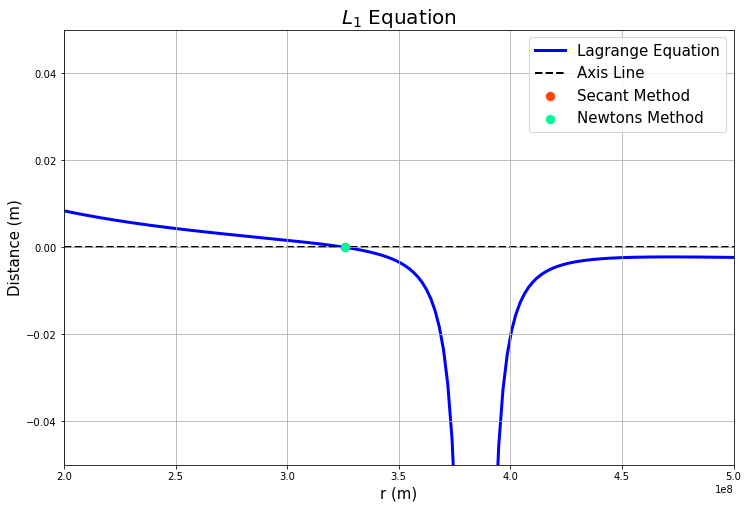

In [48]:
fig = plt.figure(figsize = (12, 8))

plt.xlim(2.0e8, 5.0e8)
plt.ylim(-0.05, 0.05)

plt.title(r'$L_1$ Equation', fontsize = 20)
plt.xlabel('r (m)', fontsize = 15)
plt.ylabel('Distance (m)', fontsize = 15)

plt.plot(r_range, L_vals, color = 'blue', linewidth = 3, zorder = 1, label = 'Lagrange Equation')

plt.axhline(y = 0, color = 'black', linestyle = '--', linewidth = 2, zorder = 1, label = 'Axis Line')

plt.scatter(secant_method(guess_1, guess_2), 0, color = 'orangered', zorder = 2, s = 70, label = 'Secant Method')
plt.scatter(newtons_method(L1_guess), 0, color = 'mediumspringgreen', zorder = 2, s = 70, label = 'Newtons Method')

plt.legend(loc = 'upper right', fontsize = 15)
plt.grid()
plt.show()